In [1]:
# build a use case of clinic with different self report levels are tested
#import numpy as np
#from weargroup_v2 import do_some_sets,plot_the_clinic_sets
from clinic_self_report import do_some_self_report_sets

N = 100000
#N = 1000
fn =f'clinicMonster_selfrep_v3with{N}.csv'

df=do_some_self_report_sets(inflater=2/3,sLIST = [1,.9,.8,.7,.6,.5,.4,.3,.2,.1],fLIST= [ 1/30 ],
                  N=N,NOFIG=True,fn=fn,clinTF=True,biggerCSV=True,
                  doDISCOUNT=True,findSteady=True,numCPUs=9)

#
#df = do_some_sets(inflater=2/3,sLIST = [1,.9,.8,.7,.6,.5],fLIST= [ 0,1/90,3/90,10/90,30/90,1,3 ],N=N,NOFIG=True,fn='clinicMonster.csv',clinTF=True)
#dfi = do_some_sets(inflater=2/3,sLIST = [1,.9,.8,.7,.6,.5],fLIST= [ 0,1/90,3/90,10/90,30/90,1,3 ],N=N,NOFIG=True,fn='clinicMonster_i.csv',clinTF=False)
#df = do_some_sets(inflater=2/3,sLIST = [1,.9,.8,.7,.6,.5,.4,.3,.2,.1,0],fLIST= [ 1/30 ],
#                  N=N,NOFIG=True,fn=fn,clinTF=True,biggerCSV=True,
#                  doDISCOUNT=True,findSteady=True,numCPUs=9)
#df = do_some_sets(inflater=2/3,sLIST = [1,.9,.8,.7,.6,.5,.4,.3,.2,.1],fLIST= [ 0 ],N=N,NOFIG=True,fn='clinicMonster_selfRep.csv',clinTF=True,biggerCSV=True)
#plot_the_clinic_sets('clinicMonster_selfRep.csv','clinicMonster_i.csv','Figure3-clinic_case.tif')

sensitivity:   0%|          | 0/10 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

FAR:   0%|          | 0/1 [00:00<?, ?it/s]

   sens       FAR   szfree  meanDrug     meanSz  how_long
0   1.0  0.033333  0.56651  1.948718   0.837607      23.0
0   0.9  0.033333  0.56751  1.974359   0.965812      23.0
0   0.8  0.033333  0.56836  1.974359   1.111111      23.0
0   0.7  0.033333  0.56858  1.974359   1.299145      23.0
0   0.6  0.033333  0.56947  1.974359   1.572650      24.0
0   0.5  0.033333  0.56928  1.974359   1.940171      24.0
0   0.4  0.033333  0.57045  2.000000   2.529915      24.0
0   0.3  0.033333  0.57170  2.000000   3.495726      24.0
0   0.2  0.033333  0.57532  2.000000   5.512821      24.0
0   0.1  0.033333  0.57370  2.025641  12.102564      24.0


/Users/danielgoldenholz/miniforge3/envs/deept2/lib/python3.11/site-packages/seaborn/categorical.py:374: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-.5, n - .5, auto=None)
/Users/danielgoldenholz/Documents/GitHub/WEARsimulator/clinic_self_report.py:47: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,15)


           FAR   szfree  meanDrug     meanSz  how_long sens
sens                                                       
0.1   0.033333  0.57370  2.025641  12.102564      24.0  0.1
0.2   0.033333  0.57532  2.000000   5.512821      24.0  0.2
0.3   0.033333  0.57170  2.000000   3.495726      24.0  0.3
0.4   0.033333  0.57045  2.000000   2.529915      24.0  0.4
0.5   0.033333  0.56928  1.974359   1.940171      24.0  0.5
0.6   0.033333  0.56947  1.974359   1.572650      24.0  0.6
0.7   0.033333  0.56858  1.974359   1.299145      23.0  0.7
0.8   0.033333  0.56836  1.974359   1.111111      23.0  0.8
0.9   0.033333  0.56751  1.974359   0.965812      23.0  0.9
1.0   0.033333  0.56651  1.948718   0.837607      23.0  1.0


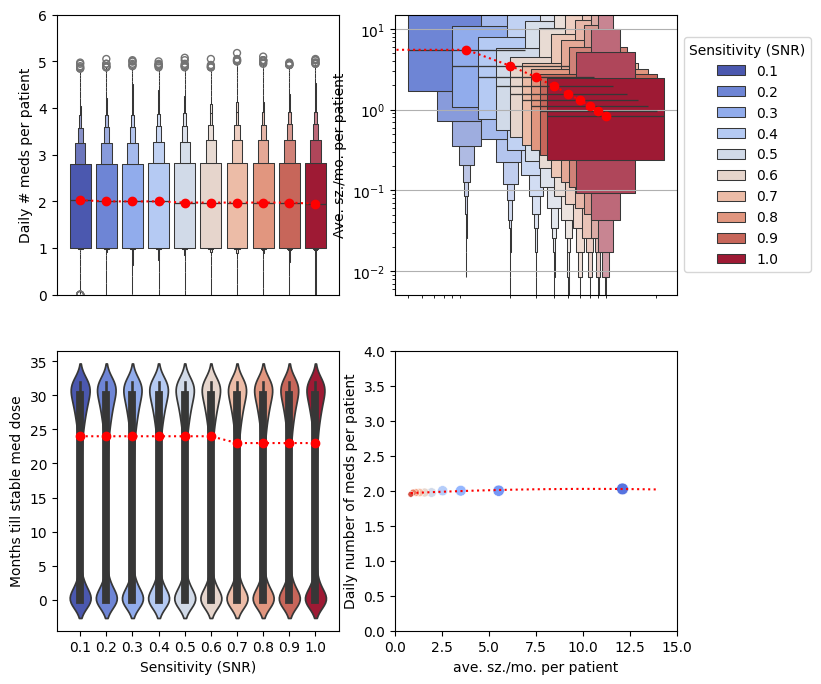

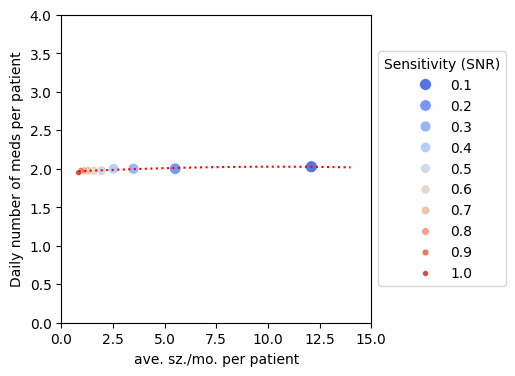

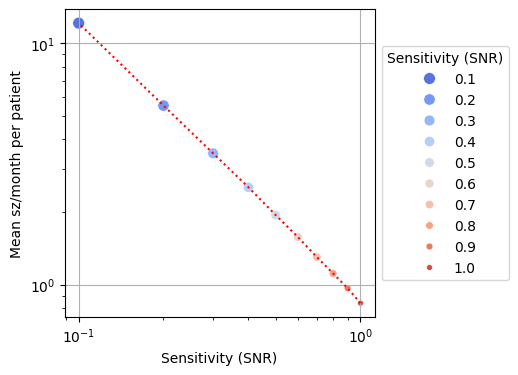

In [1]:
from clinic_self_report import drawResult_from_clinic_self_report
drawResult_from_clinic_self_report(N=100000)

In [1]:
from realSim import simulator_base

x = simulator_base(sampRATE=1,number_of_days=100)


SS = 1.0 clin_int =3 38


[393, 121, 276.0, 1, 38]

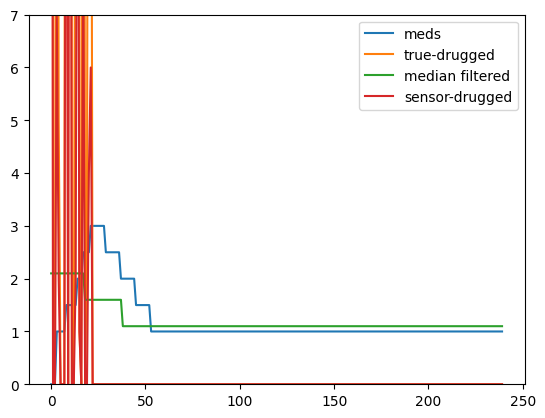

In [21]:
import numpy as np
from weargroup_v2 import sim1clinic
#N = 100000

sim1clinic(sens=.3,FAR=0,clinic_interval=3,clinTF=True,L=240,inflater=2/3,doDISCOUNT=True,findSteady=True)

In [ ]:
from huggingface_hub import snapshot_download
snapshot_download(repo_id="lysandre/arxiv-nlp")
'/home/lysandre/.cache/huggingface/hub/models--lysandre--arxiv-nlp/snapshots/894a9adde21d9a3e3843e6d5aeaaf01875c7fade'


In [25]:
import scipy